# Nivell 1








## Exercici 1

Agrupa els diferents vols utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fly = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 2/S02 T05 Exploració de les dades/DelayedFlights.csv')

In [3]:
fly = fly.drop('Unnamed: 0',axis = 1)

In [4]:
print(fly['Cancelled'].value_counts()/len(fly))


0    0.999673
1    0.000327
Name: Cancelled, dtype: float64


In [5]:
fly['Diverted'].value_counts()/len(fly)

0    0.995996
1    0.004004
Name: Diverted, dtype: float64

Se va a estratificar el muestreo para que esten todos los casos de vuelos cancelados y desviados

In [6]:
NoCanDiv = fly[(fly['Cancelled']== 0) & (fly['Diverted']==0)]
Can = fly[fly['Cancelled']!= 0 ]
Div = fly[fly['Diverted']!=0]

In [7]:
print(NoCanDiv.shape)
print(Can.shape)
print(Div.shape)
print(len(fly))


(1928371, 29)
(633, 29)
(7754, 29)
1936758


In [8]:
pd.crosstab(fly['Cancelled'], fly['Diverted'])

Diverted,0,1
Cancelled,,
0,1928371,7754
1,633,0


Al dividir el dataframe en diferents subdataframes per asegurar que el mostreig es estratificat es mostra en la taula anterior que no es solapen, com és evident, la variable cancel·lada i desviada. Per tant, al dividir-ho en dos dataframes i després tornar-ho a montar no hi ha risc de que es solapin les variables

In [9]:
#Mirem per a 10000 mostres quantes han de pertanyer als vols cancel·lats o desviats
print('Can: ', round(10000*len(Can)/len(fly),0))
print('Div: ', round(10000*len(Div)/len(fly),0))

Can:  3.0
Div:  40.0


In [10]:
SampCan = Can.sample(n=40, random_state = 42)
SampDiv = Div.sample(n=3, random_state = 42)
SampNoCanDiv = NoCanDiv.sample(n = (10000-43), random_state=42)
print(SampCan.shape)
print(SampDiv.shape)
print(SampNoCanDiv.shape)

(40, 29)
(3, 29)
(9957, 29)


In [11]:
fly2 = pd.concat([SampCan, SampDiv, SampNoCanDiv], ignore_index=True)
print(fly2.shape)

(10000, 29)


In [12]:
fly2.head()
fly2.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
9995,2008,1,4,5,1604.0,936,1912.0,1243,OO,6064,...,8.0,11.0,0,N,0,0.0,0.0,389.0,0.0,0.0
9996,2008,3,30,7,1923.0,1855,2207.0,2205,AA,1831,...,3.0,18.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9997,2008,7,30,3,715.0,700,955.0,937,OH,5565,...,11.0,15.0,0,N,0,15.0,0.0,3.0,0.0,0.0
9998,2008,12,18,4,2125.0,2108,2145.0,2128,US,656,...,6.0,17.0,0,N,0,17.0,0.0,0.0,0.0,0.0
9999,2008,12,1,1,2029.0,1910,2251.0,2148,CO,1593,...,10.0,25.0,0,N,0,0.0,0.0,0.0,0.0,63.0


In [13]:
fly2.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                43
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime      43
CRSElapsedTime          0
AirTime                43
ArrDelay               43
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                 43
TaxiOut                26
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay         3493
WeatherDelay         3493
NASDelay             3493
SecurityDelay        3493
LateAircraftDelay    3493
dtype: int64

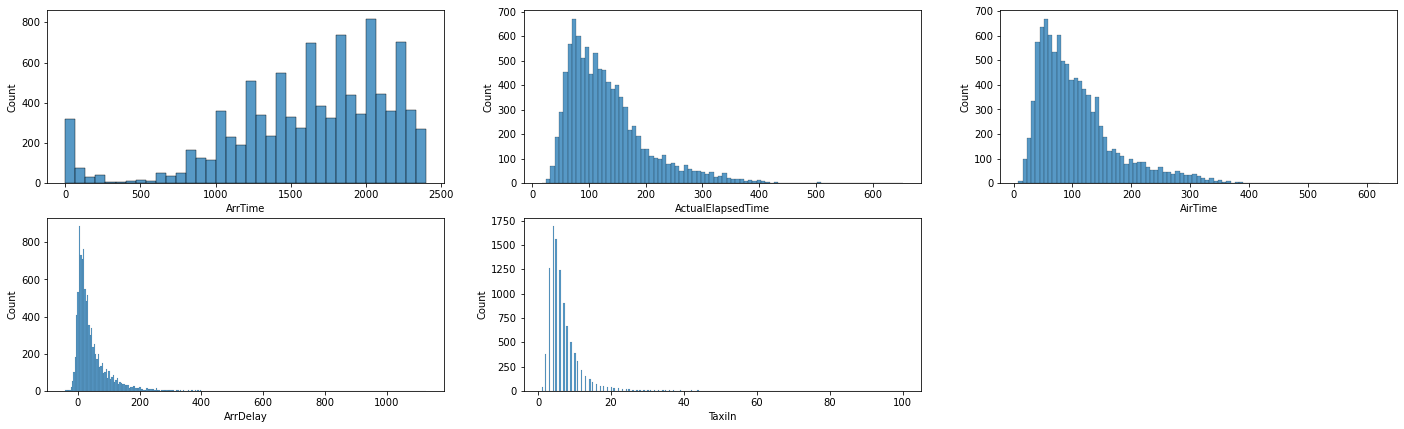

In [14]:
#Comprovem la distribució de les variables que tenen NANs i no han sigut substituits en exercicis anteriors
plt.figure(figsize = (10,7))
plt.subplot(2,3,1)
sns.histplot(fly2['ArrTime'])
plt.subplot(2,3,2)
sns.histplot(fly2['ActualElapsedTime'])
plt.subplot(2,3,3)
sns.histplot(fly2['AirTime'])
plt.subplot(2,3,4)
sns.histplot(fly2['ArrDelay'])
plt.subplot(2,3,5)
sns.histplot(fly2['TaxiIn'])
plt.subplots_adjust(right = 2)
plt.show()

Oservem que cap de les variables segueix una distribució normal. Per tant, els NaNs seràn també substituits per la mitjana per aquestes variables com en els exercicis anteriors.

Per tant, al igual que en exercicis anteriors dividirem el dataframe en variables cualitatives i cuantitatives

In [15]:
fly2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:

fly2.CancellationCode.value_counts()

N    9960
B      21
A      14
C       5
Name: CancellationCode, dtype: int64

In [17]:
#Eliminem l'any perquè no aporta informació
fly2 = fly2.drop('Year', axis=1)

In [18]:
num = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay','Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
cat = ['UniqueCarrier', 'TailNum','Origin', 'Dest', 'CancellationCode']
catNoDum = ['Cancelled', 'Diverted']#Excluim del dummies les variables que només son 0 o 1

In [19]:
flyNum = fly2.loc[:, num]
print(flyNum.shape)
flyCat = fly2.loc[:,cat]
print(flyCat.shape)
flycatNoDum = fly2.loc[:,catNoDum]
print(flycatNoDum.shape)

(10000, 21)
(10000, 5)
(10000, 2)


In [20]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

temp = imp.fit_transform(flyNum)

flyNum = pd.DataFrame(temp, columns = num)

print(flyNum.shape)
print(flyNum.isna().sum())
flyNum.head()

(10000, 21)
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,12.0,21.0,7.0,2349.0,2005.0,1719.0,2308.0,349.0,116.0,243.0,...,25.0,224.0,1437.0,6.0,14.0,1.0,0.0,2.0,0.0,10.0
1,12.0,23.0,2.0,1915.0,1655.0,1719.0,1801.0,6346.0,116.0,66.0,...,25.0,140.0,221.0,6.0,32.0,1.0,0.0,2.0,0.0,10.0
2,12.0,18.0,4.0,2043.0,2036.0,1719.0,2051.0,5655.0,116.0,75.0,...,25.0,7.0,247.0,6.0,14.0,1.0,0.0,2.0,0.0,10.0
3,11.0,16.0,7.0,2204.0,2130.0,1719.0,2355.0,1012.0,116.0,145.0,...,25.0,34.0,920.0,6.0,21.0,1.0,0.0,2.0,0.0,10.0
4,12.0,26.0,5.0,1940.0,1916.0,1719.0,1937.0,1517.0,116.0,81.0,...,25.0,24.0,238.0,6.0,14.0,1.0,0.0,2.0,0.0,10.0


In [21]:
import sklearn.preprocessing as sklp

scaler = sklp.RobustScaler()

temp = scaler.fit_transform(flyNum)

minmax = sklp.MinMaxScaler()

temp = minmax.fit_transform(temp)

flyNum = pd.DataFrame(temp, columns = num)

print(flyNum.shape)
flyNum.head()

(10000, 21)


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.000000,0.666667,1.000000,0.978741,0.849873,0.716132,0.978372,0.044473,0.15566,0.342271,...,0.05641,0.201107,0.285135,0.050505,0.032609,0.000917,0.0,0.005141,0.0,0.023095
1,1.000000,0.733333,0.166667,0.797832,0.701442,0.716132,0.763359,0.810863,0.15566,0.063091,...,0.05641,0.123616,0.038532,0.050505,0.081522,0.000917,0.0,0.005141,0.0,0.023095
2,1.000000,0.566667,0.500000,0.851188,0.863020,0.716132,0.869381,0.722556,0.15566,0.077287,...,0.05641,0.000923,0.043805,0.050505,0.032609,0.000917,0.0,0.005141,0.0,0.023095
3,0.909091,0.500000,1.000000,0.918299,0.902884,0.716132,0.998304,0.129201,0.15566,0.187697,...,0.05641,0.025830,0.180288,0.050505,0.051630,0.000917,0.0,0.005141,0.0,0.023095
4,1.000000,0.833333,0.666667,0.808253,0.812129,0.716132,0.821035,0.193738,0.15566,0.086751,...,0.05641,0.016605,0.041979,0.050505,0.032609,0.000917,0.0,0.005141,0.0,0.023095


In [22]:
flyCat.columns

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], dtype='object')

Per fer el dummies passem a utilitzar els següents prefixes
* UniqueCarrier -> UC
* TailNum -> TN
* Origin -> Or
* Dest -> De
* CancellationCode -> CC


In [23]:
flyCat = pd.get_dummies(data=flyCat, prefix = ['UC', 'TN', 'Or', 'De', 'CC'])

print(flyCat.shape)

(10000, 4599)


In [24]:
print(flyNum.shape)
print( flyCat.shape)
print(flycatNoDum.shape)

(10000, 21)
(10000, 4599)
(10000, 2)


In [25]:
#Ara toca unificar els 3 dataframes
fly3 = pd.concat([flyNum, flyCat, flycatNoDum], axis = 1)
print(fly3.shape)#Comprovem que el número de columnes es correcte

(10000, 4622)


In [26]:
fly3.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,De_WRG,De_XNA,De_YAK,De_YUM,CC_A,CC_B,CC_C,CC_N,Cancelled,Diverted
0,1.000000,0.666667,1.000000,0.978741,0.849873,0.716132,0.978372,0.044473,0.15566,0.342271,...,0,0,0,0,1,0,0,0,1,0
1,1.000000,0.733333,0.166667,0.797832,0.701442,0.716132,0.763359,0.810863,0.15566,0.063091,...,0,0,0,0,0,1,0,0,1,0
2,1.000000,0.566667,0.500000,0.851188,0.863020,0.716132,0.869381,0.722556,0.15566,0.077287,...,0,0,0,0,0,1,0,0,1,0
3,0.909091,0.500000,1.000000,0.918299,0.902884,0.716132,0.998304,0.129201,0.15566,0.187697,...,0,0,0,0,1,0,0,0,1,0
4,1.000000,0.833333,0.666667,0.808253,0.812129,0.716132,0.821035,0.193738,0.15566,0.086751,...,0,0,0,0,0,1,0,0,1,0


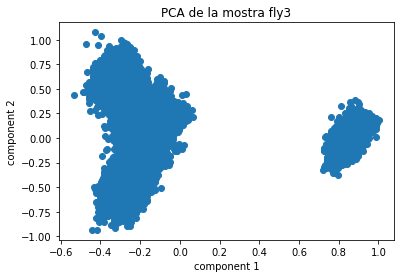

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
projected = pca.fit_transform(fly3)

plt.scatter(projected[:,0], projected[:,1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA de la mostra fly3')
plt.show()

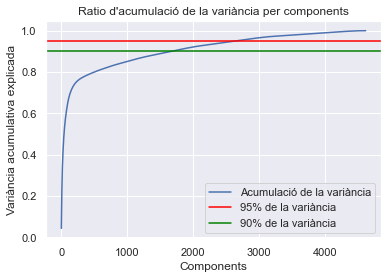

In [28]:
sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variància acumulativa explicada')
plt.axhline(0.95, color = 'red')
plt.axhline(0.9, color = 'green')
plt.title('Ratio d\'acumulació de la variància per components')
plt.legend(['Acumulació de la variància', '95% de la variància', '90% de la variància'])
plt.show()

En l'exploració de les dades a través de PCA es mostren dos grups ben diferenciats. A més, tal com mostra la ratio d'acumulació de la variància per components (gràfica anterior) es poden reduir molt el número de components. Per tant, amb l'objectiu de reduir temps de computació es treballarà amb el 90% de les dades, fet que permet reduir el número de variables per sota de la meitat i només desaprofitar un 10% de la informació.

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04259262, 0.07116561, 0.09758819, ..., 1.        , 1.        ,
       1.        ])

### k-means

In [30]:
#Primer reduïm el número de components
pca2 = PCA(0.9)

pca2.fit(fly3)

print(pca2.n_components_)

flyKmeans = pca2.transform(fly3)



1666


In [31]:
#Passem a fer el k-means

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
kmeans = KMeans(init = 'random', n_clusters = 2, 
               n_init = 10, max_iter=300, random_state=42)

kmeans.fit(flyKmeans)

KMeans(init='random', n_clusters=2, random_state=42)

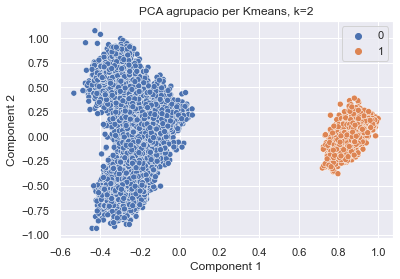

In [33]:
sns.scatterplot(x=flyKmeans[:,0], y=flyKmeans[:,1], hue = kmeans.labels_)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA agrupacio per Kmeans, k=2')
plt.show()

In [34]:
#Ara ho fem sobre 3
kmeans3 = KMeans(init = 'random', n_clusters = 3, 
               n_init = 10, max_iter=300, random_state=42)

kmeans3.fit(flyKmeans)

KMeans(init='random', n_clusters=3, random_state=42)

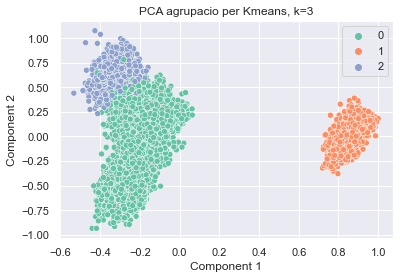

In [35]:
sns.scatterplot(x=flyKmeans[:,0], y=flyKmeans[:,1], hue = kmeans3.labels_, palette = 'Set2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA agrupacio per Kmeans, k=3')
plt.show()

In [36]:
kmeans_kwargs = {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42,
}

sse = []

for k in range(1,30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(flyKmeans)
    sse.append(kmeans.inertia_)

In [37]:
sse

[40276.6867431205,
 38413.987047026705,
 37324.45988266639,
 36307.02890261333,
 35486.15604027451,
 34847.49220913241,
 34558.398701984624,
 33730.87036252899,
 33351.50461018891,
 32590.54985925202,
 32432.269312836845,
 31767.55083462334,
 31467.77730360981,
 31404.746507126965,
 30947.562520408715,
 30513.599222289562,
 30312.022529551425,
 30191.83335241132,
 29779.01798989931,
 29369.878705078558,
 29197.839254933646,
 28689.833071983725,
 28599.433693485073,
 28470.636189496647,
 28376.691239826727,
 28307.42319217917,
 28175.58423237423,
 28064.487223400607,
 27844.08218523256]

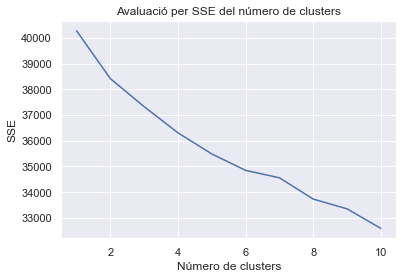

In [38]:
plt.plot(range(1,11), sse[0:10])
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Avaluació per SSE del número de clusters')
plt.show()

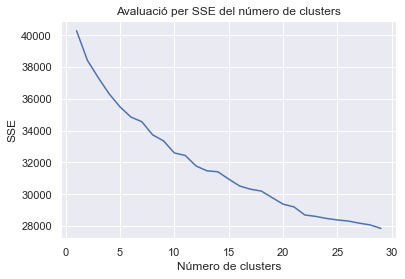

In [39]:
plt.plot(range(1,30), sse)
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Avaluació per SSE del número de clusters')
plt.show()

In [40]:
from kneed import KneeLocator

kl = KneeLocator(range(1,30), sse, curve='convex', direction='decreasing')

kl.elbow

12

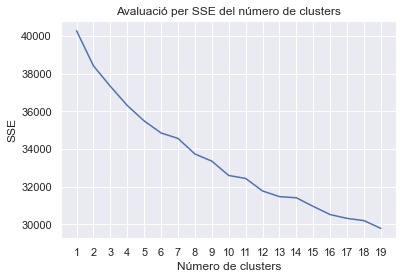

In [41]:
plt.plot(range(1,20), sse[0:19])
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Avaluació per SSE del número de clusters')
plt.xticks(range(1,20))
plt.show()

In [42]:
silhouette_coefficientes = []

for k in range(2,30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(flyKmeans)
    score =  silhouette_score(flyKmeans, kmeans.labels_)
    silhouette_coefficientes.append(score)

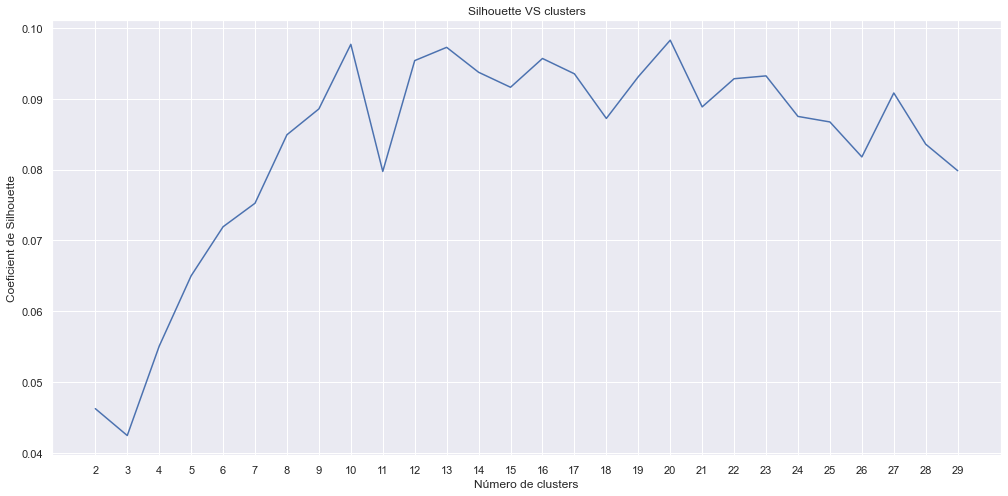

In [43]:
plt.figure(figsize=(17,8))
plt.plot(range(2,30), silhouette_coefficientes)
plt.xticks(range(2,30))
plt.xlabel('Número de clusters')
plt.ylabel('Coeficient de Silhouette')
plt.title('Silhouette VS clusters')
plt.show()

Tant el mètode del colze com silhouette no han donat bons resultats. Això pot voler dir que és probable que hi hagin més de dos grups, a diferencia del que es veia al explorar les dades en la PCA. Per un altre costat, uns valors tan baixos de silhouette poden indicar que es necessari fer un treball previ més exhaustiu de les dades a través de feature enginering, millorar el preprocessing o utilitzar altres eines per tractar, per exemple, sparse matrix.

Un altre opció de que hagi donat uns resultats tan dolents pot ser degut a com es distribueixen les dades. Ja que K-means necessita que es distribueixin en forma de cercle i pot ser en aquest cas son més el·lipsoidals tal i com es veu reflectit en la PCA. Sent més recomenable Gaussian Mixture Models.

# Nivell 2



## Exercici 2

Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [44]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

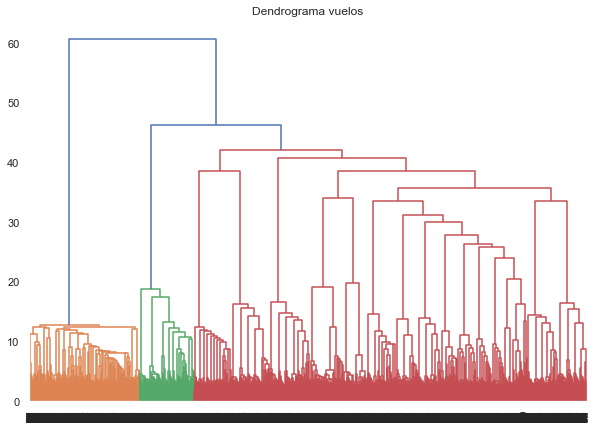

In [45]:
plt.figure(figsize=(10,7))
plt.title('Dendrograma vuelos')
dendogram = sch.dendrogram(sch.linkage(flyKmeans, method = 'ward'))
plt.show()


In [46]:
model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

model.fit(flyKmeans)

labels = model.labels_

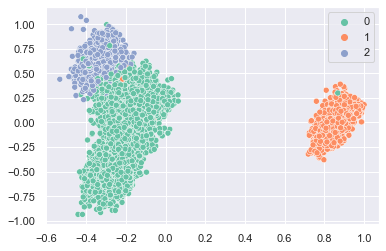

In [47]:
sns.scatterplot(x=flyKmeans[:,0], y = flyKmeans[:,1], hue=labels,
               palette='Set2')
plt.show()

En la gràfica es mostra que els resultats obtinguts amb mètodes jeràrquics i K-means son molt semblants. Tot i així, en el gràfic es veu algun cas entre el grup 0 i 2 que no estan a l’espai que els pertocaria. Això pot ser degut per la resta de components que no apareixen en el gràfic i, per tant, informació que no s’està utilitzant. Per un altre costat, com ja s’ha comentat anteriorment, seria convenient revisar els mètodes empleats en el preprocessament de les dades o aplicar feature engineering per millorar els resultats.

# Nivell 3


## Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [48]:
score2 =  silhouette_score(flyKmeans, labels)

score2

0.04123369140080739

Com era d'esperar, degut als resultats anteriors, el valor de silhoutte és molt baix. Això pot ser degut a que la distància entre en els grups es petita i per això el valor és proper a 0. Per tant, com ja s'ha comentat, seria bo tornar a preprocessar les dades per millorar el rendiment. 

### LLibreries utilitzades

In [49]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/workNote: you may need to restart the kernel to use updated packages.
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153135622/work/dist

appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow @ file:///C:/ci/arrow_1617738834352/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1629829318700/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1620866417880/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_